<a href="https://colab.research.google.com/github/bits33ker/itbadl/blob/main/MontyHall_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**Definicion de funciones**

In [2]:
#ahora reduzco el numero de puertas a 2 eliminando el resto de las puertas menos la que contiene el auto y una mas
def cambio(auto, primer_eleccion, puertas):
  segunda_eleccion = np.array(auto)
  for i in range(len(auto)):
    segunda_eleccion[i] = auto[i]
    if primer_eleccion[i]==auto[i]:
      while segunda_eleccion[i]==auto[i]:
        segunda_eleccion[i] = np.random.randint(0, puertas)  
  return np.array(segunda_eleccion)  

In [3]:
#comparo eleccion con array de autos
def comparo(auto, eleccion, simulaciones):
  resultado = 0
  for i in range(simulaciones):
    if eleccion[i]==auto[i]:
      resultado = resultado + 1
  return resultado

In [4]:
#devuelve array con resultdos de acuerdo a la cantidad de simulaciones
def acumulo(auto, eleccion, simulaciones):
  resultado = np.zeros(simulaciones)
  acumulado = 0
  for i in range(simulaciones):
    if eleccion[i]==auto[i]:
      acumulado = acumulado + 1
    resultado[i] = (100*acumulado)/(i+1)
  return resultado

#**Configuracion de Simulacion**

In [5]:
simulaciones = 1000
puertas = 3

# **Arrays**

In [6]:
#auto: puerta donde se encuentra el auto
auto = np.random.randint(0, puertas, simulaciones)

In [7]:
#seleccion original del participante
seleccion = np.random.randint(0, puertas, simulaciones)

In [8]:
#reduzco puertas
segunda_seleccion = cambio(auto, seleccion, puertas)

# **Resultados**

In [9]:
#comparo arrays
resultado_primera = comparo(auto, seleccion, simulaciones)  
resultado_segunda = comparo(auto, segunda_seleccion, simulaciones)  
print("Aciertos de Primer eleccion: " + str(resultado_primera) + " Simulaciones: " + str(simulaciones) + " Porcentaje: " + str((100*resultado_primera)/simulaciones))
print("Aciertos de Segunda eleccion: " + str(resultado_segunda) + " Simulaciones: " + str(simulaciones) + " Porcentaje: " + str((100*resultado_segunda)/simulaciones))
    

Aciertos de Primer eleccion: 335 Simulaciones: 1000 Porcentaje: 33.5
Aciertos de Segunda eleccion: 665 Simulaciones: 1000 Porcentaje: 66.5


# **Graficos**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


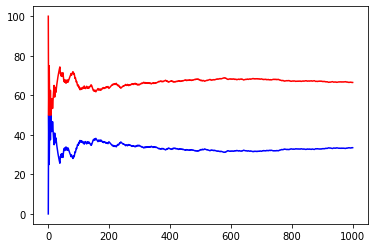

In [10]:
#grafico los procentaje de acierto por la primer seleccion y la segunda. 
#En el se ve que se requiere una cantidad de simulaciones para llegar a los valores indicados de montyhall.
acumulado_primera = acumulo(auto, seleccion, simulaciones)  
acumulado_segunda = acumulo(auto, segunda_seleccion, simulaciones)  
x = np.linspace(0, simulaciones, simulaciones)
fig = plt.figure();
ax1 = fig.add_subplot(111)
ax1.plot(x, acumulado_primera, label = 'porcentaje', color = 'blue')
ax2 = fig.add_subplot(111)
ax2.plot(x, acumulado_segunda, label = 'porcentaje', color = 'red')
plt.show()

